In [1]:
import cProfile
import pstats
from io import StringIO

import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
def passive_square(x, y, z):
    xc, yc = x - 0.5, y - 0.75
    return np.where(
        (np.abs(xc) < 0.15) & (np.abs(yc) < 0.15),
        1.0,
        0.0,
    )


sim = AdvectionSolver(
    ic=ic.slotted_disk,
    # ic_passives={"passive_square": passive_square},
    bcx="ic",
    bcy="ic",
    nx=64,
    ny=64,
    nz=1,
    p=3,
    interpolation_scheme="gauss-legendre",
    MOOD=True,
    NAD=1e-5,
)

# sim.run([np.pi, 2 * np.pi])

In [3]:
isinstance(np, (np.ndarray, np.generic))

False

In [4]:
pr = cProfile.Profile()
pr.enable()
sim.run(n=20)
pr.disable()
s = StringIO()
ps = pstats.Stats(pr, stream=s).sort_stats("cumtime")
ps.print_stats()
print(s.getvalue())

100%|██████████| 20/20 [00:01<00:00, 10.91it/s]

         318804 function calls (314916 primitive calls) in 1.895 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      3/2    0.000    0.000    1.893    0.946 /Users/jonathan/miniconda3/envs/superfv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3543(run_code)
     11/2    0.000    0.000    1.893    0.946 {built-in method builtins.exec}
   3194/1    0.034    0.000    1.844    1.844 /Users/jonathan/Desktop/superfv/superfv/tools/timer.py:8(wrapper)
      2/1    0.000    0.000    1.843    1.843 /Users/jonathan/Desktop/superfv/superfv/finite_volume_solver.py:1418(run)
        1    0.000    0.000    1.843    1.843 /Users/jonathan/Desktop/superfv/superfv/explicit_ODE_solver.py:361(rk4)
        1    0.001    0.001    1.843    1.843 /Users/jonathan/Desktop/superfv/superfv/explicit_ODE_solver.py:184(integrate)
       20    0.002    0.000    1.816    0.091 /Users/jonathan/Desktop/superfv/superfv/explicit_ODE_solver.p

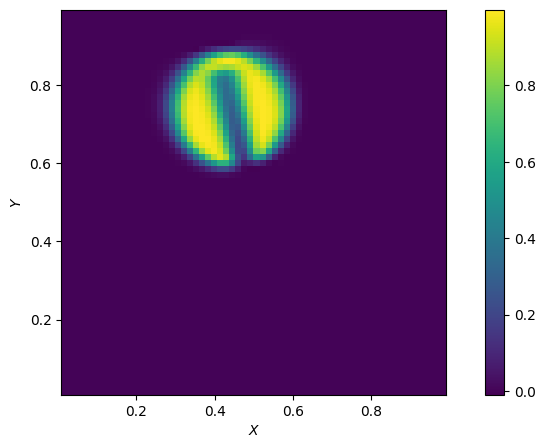

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "rho", x=None, y=None)
# add colorbar
ax.figure.colorbar(ax.images[0], ax=ax)

In [6]:
sim.timer.print_report()

Category                                              Calls      Cumulative Time
----------------------------------------------------------------------------------
!ExplicitODESolver.integrate.body                         1                 1.86
!FiniteVolumeSolver.run                                   1                 1.89
AdvectionSolver.advection_upwind                        320                 0.10
AdvectionSolver.compute_dt                              160                 0.02
AdvectionSolver.minisnapshot                             21                 0.00
ExplicitODESolver.integrate                               1                 1.89
ExplicitODESolver.minisnapshot                           21                 0.00
FiniteVolumeSolver.MOOD_loop                             80                 0.83
FiniteVolumeSolver.apply_bc                            1042                 0.71
FiniteVolumeSolver.compute_dt_and_fluxes                160                 1.52
FiniteVolumeSolver.compute